### Finding out how long it takes to decompose adjacency matrices depending on node number and on edge probability

In [ ]:
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from torch_geometric.datasets.graph_generator import ERGraph
from utils.eigen_utils import get_eigen_decomp

# Lists to store data
num_nodes_list = []
edge_probability_list = []
elapsed_time_list = []

for num_nodes in [10, 25, 50, 100, 250, 500, 1000, 2000, 3000, 5000, 10000, 20000]:
    for edge_probability in [0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        graph = ERGraph(num_nodes, edge_probability)

        # Measure the time it takes to compute the eigen decomposition
        start_time = time.time()
        eigenvalues, eigenvectors = get_eigen_decomp(graph(), "sym")
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Append data to lists
        num_nodes_list.append(num_nodes)
        edge_probability_list.append(edge_probability)
        elapsed_time_list.append(elapsed_time)

# Convert lists to NumPy arrays
num_nodes_array = np.array(num_nodes_list)
edge_probability_array = np.array(edge_probability_list)
elapsed_time_array = np.array(elapsed_time_list)

# Reshape arrays for 2D surface plot
num_nodes_mesh, edge_probability_mesh = np.meshgrid(
    np.unique(num_nodes_array), np.unique(edge_probability_array)
)

elapsed_time_mesh = elapsed_time_array.reshape(num_nodes_mesh.shape)

# Create a 2D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(num_nodes_mesh, edge_probability_mesh, elapsed_time_mesh, cmap='viridis')

# Set labels
ax.set_xlabel('Number of Nodes', labelpad=10)
ax.set_ylabel('Edge Probability', labelpad=10)
ax.set_zlabel('Elapsed Time (seconds)', labelpad=10)

# Adjust layout
fig.colorbar(surface, ax=ax, pad=0.2)  # Add colorbar with proper padding

# Rotate labels
ax.xaxis.label.set_rotation(10)
ax.yaxis.label.set_rotation(10)
ax.zaxis.label.set_rotation(10)

# Show the plot
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from torch_geometric.datasets.graph_generator import ERGraph
from utils.eigen_utils import get_eigen_decomp

# Lists to store data
num_nodes_list = []
edge_probability_list = []
elapsed_time_list = []

for num_nodes in [3, 5, 7, 10, 15, 25, 40, 50, 75, 90, 100, 150, 250, 400, 500]:
    for edge_probability in [0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8]:
        graph = ERGraph(num_nodes, edge_probability)
        # Measure the time it takes to compute the eigen decomposition
        start_time = time.time()
        eigenvalues, eigenvectors = get_eigen_decomp(graph(), "sym")
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Append data to lists
        num_nodes_list.append(num_nodes)
        edge_probability_list.append(edge_probability)
        elapsed_time_list.append(elapsed_time)

# Convert lists to NumPy arrays
num_nodes_array = np.array(num_nodes_list)
edge_probability_array = np.array(edge_probability_list)
elapsed_time_array = np.array(elapsed_time_list)

# Reshape arrays for 2D surface plot
num_nodes_mesh, edge_probability_mesh = np.meshgrid(
    np.unique(num_nodes_array), np.unique(edge_probability_array)
)

elapsed_time_mesh = elapsed_time_array.reshape(num_nodes_mesh.shape)

# Create a 2D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(num_nodes_mesh, edge_probability_mesh, elapsed_time_mesh, cmap='viridis')

# Set labels
ax.set_xlabel('Number of Nodes', labelpad=10)
ax.set_ylabel('Edge Probability', labelpad=10)
ax.set_zlabel('Elapsed Time (seconds)', labelpad=10)

# Adjust layout
fig.colorbar(surface, ax=ax, pad=0.2)  # Add colorbar with proper padding

# Rotate labels
ax.xaxis.label.set_rotation(10)
ax.yaxis.label.set_rotation(10)
ax.zaxis.label.set_rotation(10)

# Show the plot
plt.show()


### Checking on Erdos Reni graphs how the adjacency matrix changes

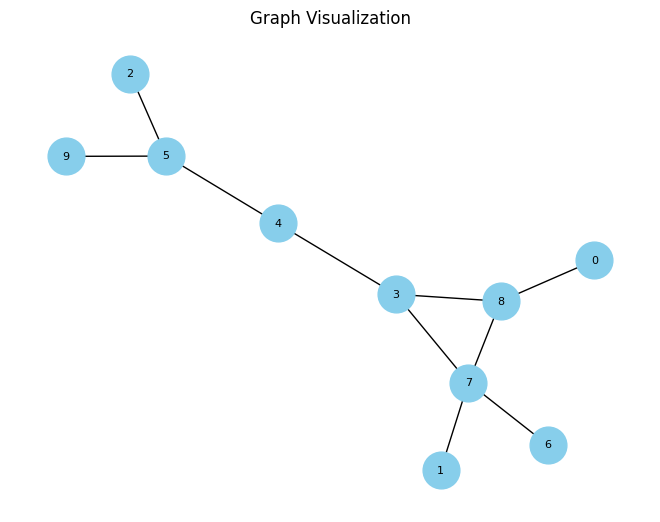

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.datasets.graph_generator import ERGraph
from utils.eigen_utils import get_eigen_decomp

def create_random_graph(num_nodes, edge_probability):
    graph = ERGraph(num_nodes, edge_probability)
    return graph()

def compute_eigen_decomposition(graph):
    return get_eigen_decomp(graph, "sym")

def visualize_graph(graph):
    edge_index = graph.edge_index.numpy()
    g_nx = nx.Graph()
    g_nx.add_edges_from(edge_index.T)

    pos = nx.spring_layout(g_nx, seed=42)

    nx.draw(g_nx, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8)
    plt.title("Graph Visualization")
    plt.show()

    return pos

def visualize_eigenvalues(eigenvalues):
    plt.bar(range(len(eigenvalues)), eigenvalues, color="lightcoral")
    plt.xlabel("Eigenvalue Index")
    plt.ylabel("Eigenvalue Magnitude")
    plt.title("Eigenvalues Bar Plot")
    plt.show()

# Usage
num_nodes = 10
edge_probability = 0.25

# Create a random graph
graph = create_random_graph(num_nodes, edge_probability)

# Visualize the graph
pos = visualize_graph(graph)



Data(edge_index=[2, 20], num_nodes=10)


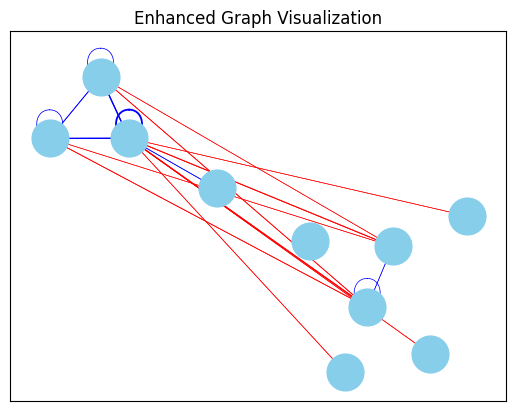

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import dense_to_sparse

import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.pyplot as plt
import networkx as nx
import torch_geometric.transforms as T

import matplotlib.pyplot as plt
import networkx as nx

from torch_geometric.data import Data

# Compute the eigen decomposition
from utils.transforms import AddSpectra, GetFirstEigenTresholded


t = T.Compose([AddSpectra(), GetFirstEigenTresholded(5)])
print(graph)
g_enhanced = t([graph])


def visualize_enhanced_graph(graph, pos):
    edge_index = graph.edge_index.numpy()

    enhanced_edges = graph.Q_edge_thresholded[1][0]
    enhanced_edges_attr = graph.Q_edge_thresholded[1][1]

    g_nx = nx.Graph()
    g_nx.add_edges_from(edge_index.T)
    g_nx.add_edges_from(enhanced_edges.numpy().T, attr=enhanced_edges_attr)


    plt.figure()

    # Plot original edges
    #for edge in edge_index.T:
    #    nx.draw_networkx_edges(g_nx, pos, edgelist=[tuple(edge)], edge_color='black', width=1.0)

    # Plot enhanced edges
    for i in range(enhanced_edges.size(1)):
        edge = enhanced_edges[:, i].tolist()
        edge_attr = enhanced_edges_attr[i].item()

        width = 4 * edge_attr  # Adjust width based on edge attribute
        edge_color = 'blue' if edge_attr > 0 else 'red'
        
        nx.draw_networkx_edges(g_nx, pos, edgelist=[tuple(edge)], edge_color=edge_color, width=width)



    nx.draw_networkx_nodes(g_nx, pos, node_size=700, node_color="skyblue")

    plt.title("Enhanced Graph Visualization")
    plt.show()

# Usage
visualize_enhanced_graph(g_enhanced[0], pos)





### Looking at varius treshold values

### Try out differentioability on thresholding adjacencies

In [ ]:
import torch
from torch.nn import ReLU

relu = ReLU()

beta = torch.tensor([1.0], requires_grad=True)
print('beta', beta)
Q_edge_weights = torch.randn(4, requires_grad=True)
print('Q_edge_weights', Q_edge_weights)
indices = relu(Q_edge_weights + beta)
print('indices', indices)
out = torch.index_select(Q_edge_weights + beta, 0, indices.nonzero().flatten())
print('out', out)
out = out - beta
out.mean().backward()
print('beta grad', beta.grad)
print('Q_edge_weights grad', Q_edge_weights.grad)

In [ ]:
import torch

A = torch.tensor([[2.0, 0.01],[0.01, 1.1]])
beta = torch.tensor([1.0], requires_grad=True)
I = torch.tensor([[1.0, 1.0],[1.0, 1.0]])

out = relu((A-beta*I)*(A-beta*I)) + beta*I

out.mean().backward()
print('beta grad', beta.grad)